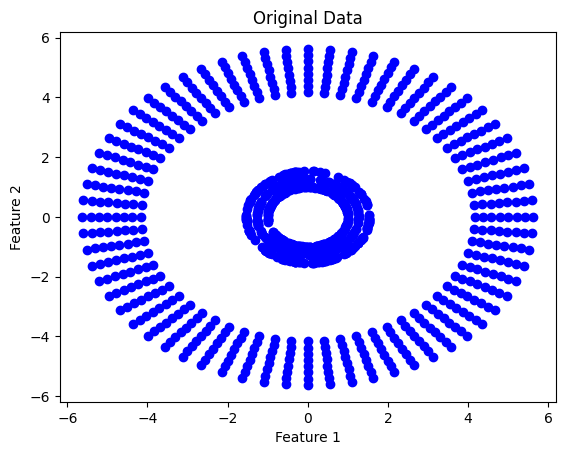

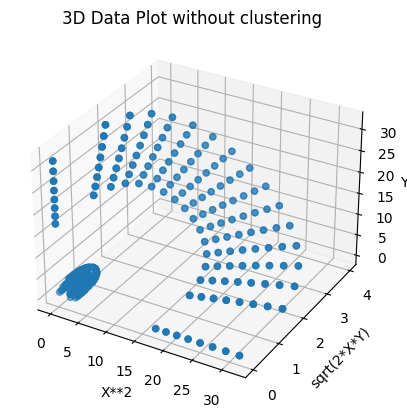

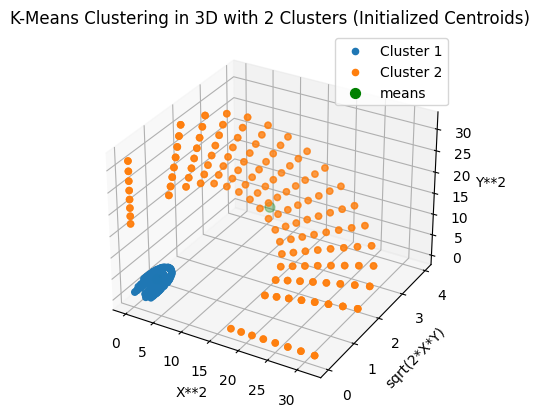

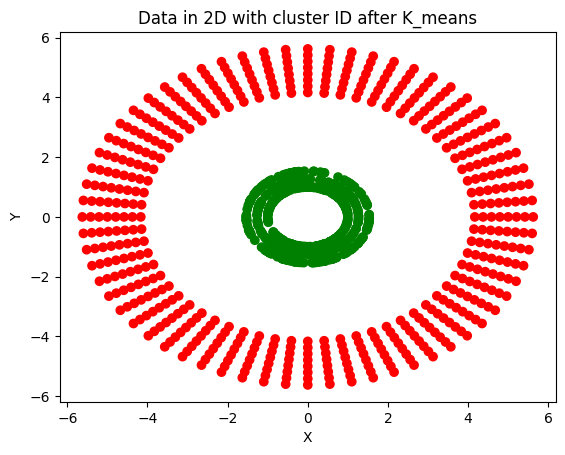

In [129]:
#part 2 
#1
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("kmeans_data.txt")

plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', label='Original Data')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

transformed_data = np.array([
    data[:, 0] ** 2,
    np.sqrt(np.abs(data[:, 0] * data[:, 1])),
    data[:, 1] ** 2
]).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], marker='o')
ax.set_xlabel('X**2')
ax.set_ylabel('sqrt(2*X*Y)')
ax.set_zlabel('Y**2')
plt.title('3D Data Plot without clustering ')
plt.show()

def k_means(data, k, max_iters=10):
    means = data[:k]
    
    for _ in range(max_iters):
        c_id = np.argmin(np.linalg.norm(data[:, None] - means, axis=2), axis=1)
        new_means = np.array([data[c_id == i].mean(axis=0) for i in range(k)])        
        if np.all(means == new_means):
            break
        means = new_means
    return c_id, means

k = 2 
c_id, means = k_means(transformed_data, k)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    cluster_points = transformed_data[c_id == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], marker='o', label=f'Cluster {i + 1}')

ax.scatter(means[:, 0], means[:, 1], means[:, 2], c='green', marker='.', s=200, label='means')
ax.set_xlabel('X**2')
ax.set_ylabel('sqrt(2*X*Y)')
ax.set_zlabel('Y**2')
plt.title('K-Means Clustering in 3D with 2 Clusters (Initialized Centroids)')
plt.legend()
plt.show()

colors = np.array(['green', 'red'])

plt.scatter(data[:, 0], data[:, 1], c=colors[c_id], marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data in 2D with cluster ID after K_means')
plt.show()

   


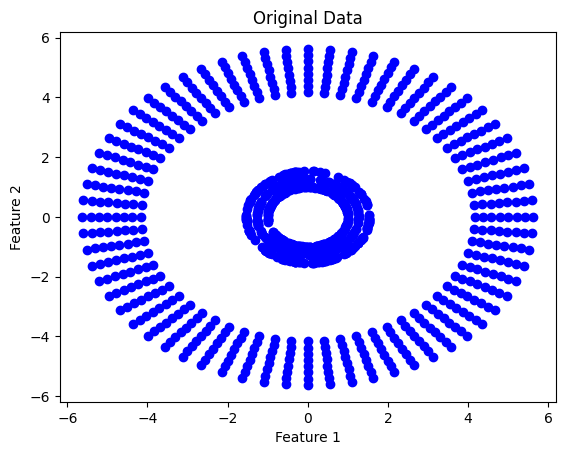

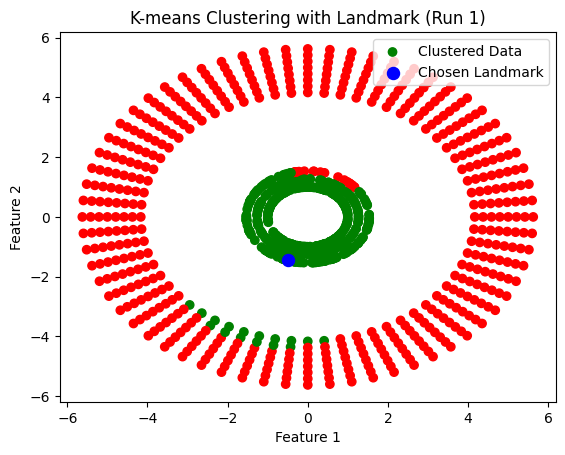

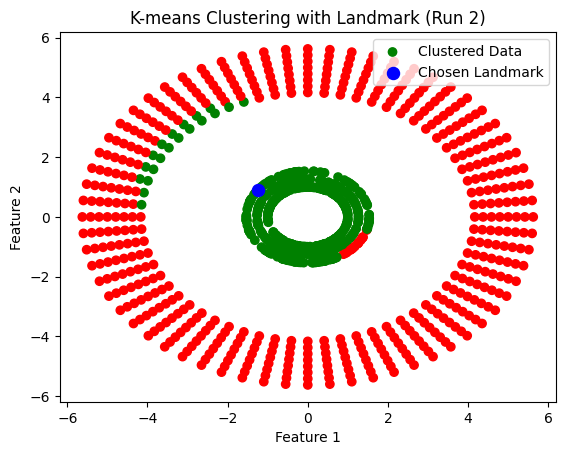

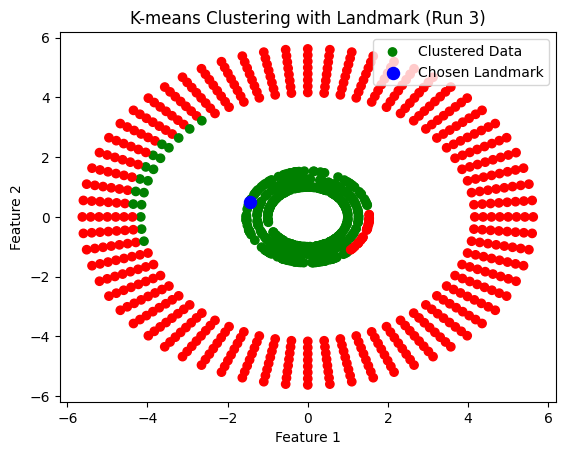

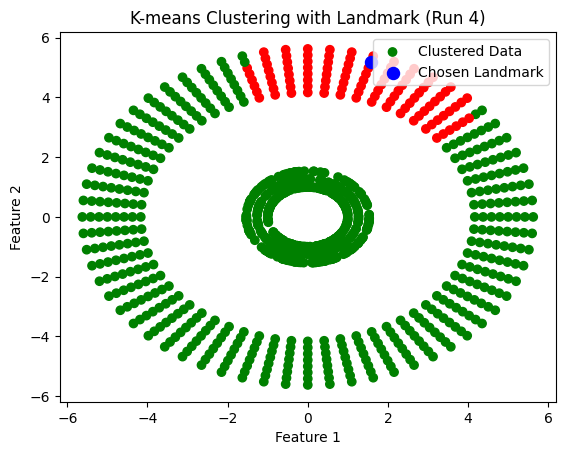

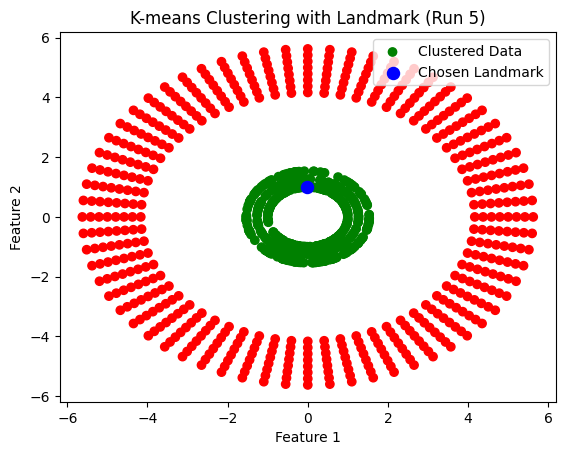

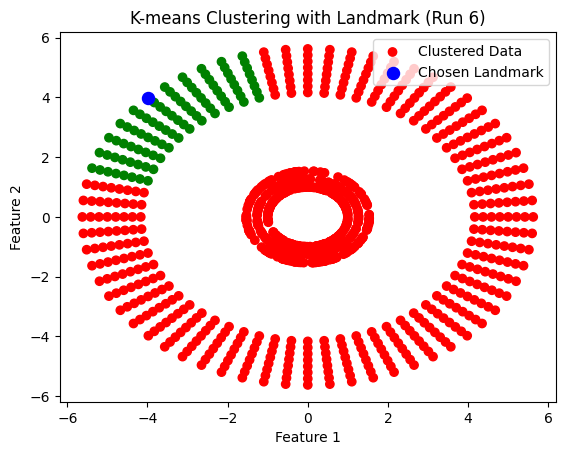

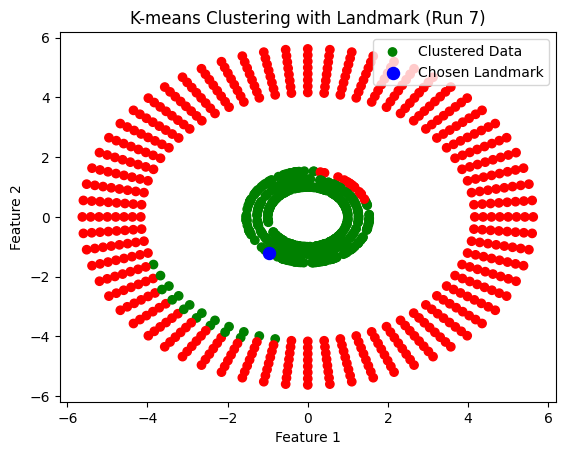

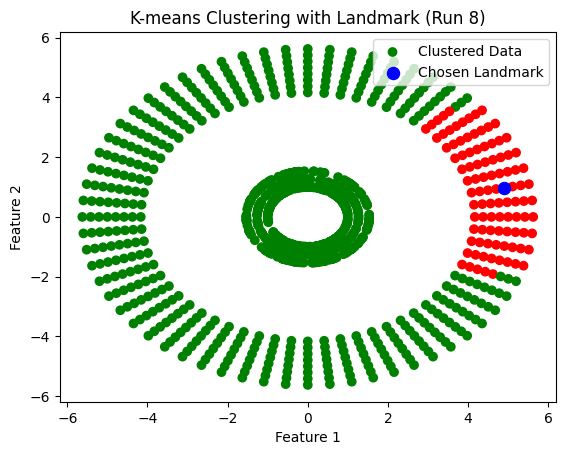

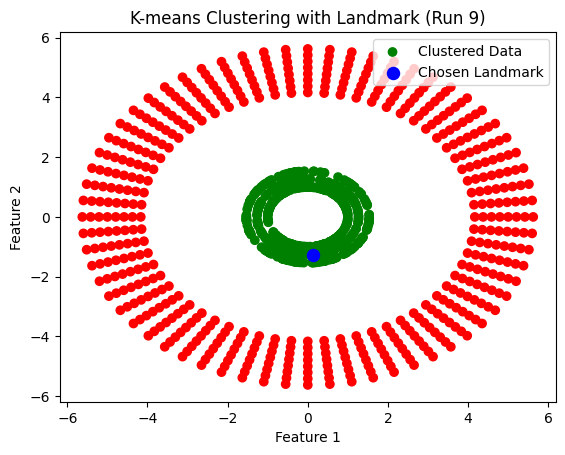

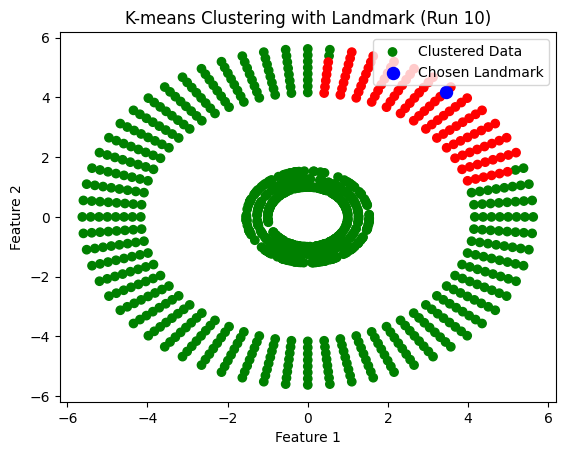

In [128]:
#part 2 
#2 

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt("kmeans_data.txt")
# Plot the original data
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', label='Original Data')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

N = 10
for val in range(0,N):

    temp  = np.random.randint(len(data))
    l = data[temp]
    gamma = 0.1 

    kernal=np.zeros((len(data))) 
    for i in range(0,len(data)):
        kernal[i]=np.exp(-gamma * np.linalg.norm(data[i] - l)**2)
    changed_data=np.array(kernal)

    shaped_data = changed_data.reshape(-1,1)
    K = 2 
  
    n,m = shaped_data.shape
    means=[0,0]
    means[0] = shaped_data[0]
    means[1] = shaped_data[1]
    
    for itr in range(0,100):
        labels = np.argmin(np.array([np.linalg.norm(shaped_data - c, axis=1) for c in means]), axis=0)

        for j in range(K):
            means[j] = np.mean(shaped_data[labels == j], axis=0)

    colors = np.array(['green', 'red'])
    plt.scatter(data[:, 0], data[:, 1], c=colors[labels], marker='o', label='Clustered Data')
    plt.scatter(l[0], l[1], c='blue', marker='.', s=300, label='Chosen Landmark')
    plt.title(f"K-means Clustering with Landmark (Run {val + 1})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()   



    




